# Digit Recognizer
Learn computer vision fundamentals with the famous MNIST data

# File discription
The data files train.csv and test.csv contain gray-scale images of hand-drawn digits, from zero through nine.

Each image is 28 pixels in height and 28 pixels in width, for a total of 784 pixels in total. Each pixel has a single pixel-value associated with it, indicating the lightness or darkness of that pixel, with higher numbers meaning darker. This pixel-value is an integer between 0 and 255, inclusive.

The training data set, (train.csv), has 785 columns. The first column, called "label", is the digit that was drawn by the user. The rest of the columns contain the pixel-values of the associated image.

Each pixel column in the training set has a name like pixelx, where x is an integer between 0 and 783, inclusive. Then pixelx is located on row i and column j of a 28 x 28 matrix, (indexing by zero).



# imports

In [1]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

import seaborn as sns
import matplotlib.image as mpimg
import matplotlib.pyplot as plt
import matplotlib
%matplotlib inline

from time import time

from sklearn.manifold import TSNE
from sklearn.decomposition import PCA
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis as LDA
from sklearn.model_selection import GridSearchCV
from sklearn.svm import SVC

import math

# Loading the training set
Let's load the dataset and see some basic info

In [2]:
mnist = pd.read_csv("G:/Data Science/mnist/train (1).csv")
mnist.info()

#train = pd.read_csv('train.csv')
print(mnist.shape)
mnist.sample(5)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 42000 entries, 0 to 41999
Columns: 785 entries, label to pixel783
dtypes: int64(785)
memory usage: 251.5 MB
(42000, 785)


,label,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
10562,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
31976,7,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
15366,9,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
13947,6,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
23412,6,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [3]:
mnist.describe()

,label,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
count,42000.000000,42000.0,42000.0,42000.0,42000.0,42000.0,42000.0,42000.0,42000.0,42000.0,...,42000.000000,42000.000000,42000.000000,42000.00000,42000.000000,42000.000000,42000.0,42000.0,42000.0,42000.0
mean,4.456643,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.219286,0.117095,0.059024,0.02019,0.017238,0.002857,0.0,0.0,0.0,0.0
std,2.887730,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,6.312890,4.633819,3.274488,1.75987,1.894498,0.414264,0.0,0.0,0.0,0.0
min,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.0,0.0,0.0,0.0
25%,2.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.0,0.0,0.0,0.0
50%,4.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.0,0.0,0.0,0.0
75%,7.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.0,0.0,0.0,0.0
max,9.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,254.000000,254.000000,253.000000,253.00000,254.000000,62.000000,0.0,0.0,0.0,0.0


In [4]:
print (mnist.head())

   label  pixel0  pixel1  pixel2  pixel3  pixel4  pixel5  pixel6  pixel7  \
0      1       0       0       0       0       0       0       0       0   
1      0       0       0       0       0       0       0       0       0   
2      1       0       0       0       0       0       0       0       0   
3      4       0       0       0       0       0       0       0       0   
4      0       0       0       0       0       0       0       0       0   

   pixel8    ...     pixel774  pixel775  pixel776  pixel777  pixel778  \
0       0    ...            0         0         0         0         0   
1       0    ...            0         0         0         0         0   
2       0    ...            0         0         0         0         0   
3       0    ...            0         0         0         0         0   
4       0    ...            0         0         0         0         0   

   pixel779  pixel780  pixel781  pixel782  pixel783  
0         0         0         0         0         

# function to see  the pictures before and after the dimensionality reduction.

In [5]:
# Plots the image represented by a row
def plot_number(row, w=28, h=28, labels=True):
    if labels:
        # the first column contains the label
        label = row[0]
        # The rest of columns are pixels
        pixels = row[1:]
    else:
        label = ''
        # The rest of columns are pixels
        pixels = row[0:]
    
#    print(row.shape, pixels.shape)
        

    # Make those columns into a array of 8-bits pixels
    # This array will be of 1D with length 784
    # The pixel intensity values are integers from 0 to 255
    pixels = 255-np.array(pixels, dtype='uint8')

    # Reshape the array into 28 x 28 array (2-dimensional array)
    pixels = pixels.reshape((w, h))

    # Plot
    if labels:
        plt.title('Label is {label}'.format(label=label))
    plt.imshow(pixels, cmap='gray')

# Plots a whole slice of pictures
def plot_slice(rows, size_w=28, size_h=28, labels=True):
    num = rows.shape[0]
    w = 4
    h = math.ceil(num / w)
    fig, plots = plt.subplots(h, w)
    fig.tight_layout()

    for n in range(0, num):
        s = plt.subplot(h, w, n+1)
        s.set_xticks(())
        s.set_yticks(())
        plot_number(rows.ix[n], size_w, size_h, labels)
    plt.show()

# Visualizing some rows
Plotting a slice to see correspondence between labels and pictures.

G:\Anaconda3\lib\site-packages\ipykernel_launcher.py:41: DeprecationWarning: 
.ix is deprecated. Please use
.loc for label based indexing or
.iloc for positional indexing

See the documentation here:
http://pandas.pydata.org/pandas-docs/stable/indexing.html#ix-indexer-is-deprecated


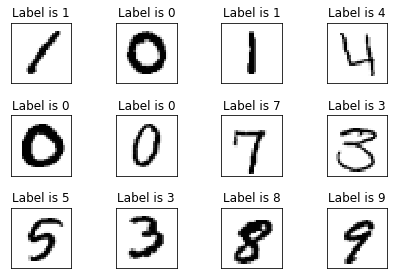

In [6]:
# Plotting first few rows
plot_slice(mnist[0:12])




# Dimensionality reduction
I try to see if a PCA can help to reduce the number of features without affecting too much information. First of all I split the whole dataset in features and class, then I prepare the split of both sets to training and test set.

In [7]:
X_train = mnist.drop(['label'], axis='columns', inplace=False)
y_train = mnist['label']

from sklearn.model_selection import train_test_split
X_tr, X_ts, y_tr, y_ts = train_test_split(X_train, y_train, test_size=0.30, random_state=4)

In [9]:
n_components = 16
t0 = time()
pca = PCA(n_components=n_components, svd_solver='randomized',
          whiten=True).fit(X_train)
print("done in %0.3fs" % (time() - t0))

X_train_pca = pca.transform(X_train)

done in 3.185s


# n_components = 16
t0 = time()
pca = PCA(n_components=n_components, svd_solver='randomized',
          whiten=True).fit(X_train)
print("done in %0.3fs" % (time() - t0))

X_train_pca = pca.transform(X_train)

Let's see the variance histogram.

0.5953479726591057

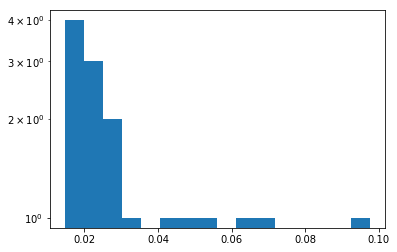

In [10]:
plt.hist(pca.explained_variance_ratio_, bins=n_components, log=True)
pca.explained_variance_ratio_.sum()

Let's see how the smaller pictures look.

G:\Anaconda3\lib\site-packages\ipykernel_launcher.py:41: DeprecationWarning: 
.ix is deprecated. Please use
.loc for label based indexing or
.iloc for positional indexing

See the documentation here:
http://pandas.pydata.org/pandas-docs/stable/indexing.html#ix-indexer-is-deprecated


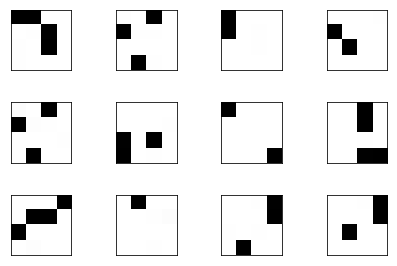

In [11]:
plot_slice(pd.DataFrame(data=X_train_pca[0:12]), size_w=4, size_h=4, labels=False)

In [12]:
param_grid = { "C" : [0.1]
              , "gamma" : [0.1]}
rf = SVC()
gs = GridSearchCV(estimator=rf, param_grid=param_grid, scoring='accuracy', cv=2, n_jobs=-1, verbose=1)
gs = gs.fit(X_train_pca, y_train)

print(gs.best_score_)
print(gs.best_params_)

Fitting 2 folds for each of 1 candidates, totalling 2 fits


[Parallel(n_jobs=-1)]: Done   2 out of   2 | elapsed:   46.8s finished


0.9428333333333333
{'C': 0.1, 'gamma': 0.1}


In [13]:
bp = gs.best_params_

t0 = time()
clf = SVC(C=bp['C'], kernel='rbf', gamma=bp['gamma'])
clf = clf.fit(X_train_pca, y_train)
print("done in %0.3fs" % (time() - t0))

done in 34.778s


In [14]:
clf.score(pca.transform(X_ts), y_ts)

0.9567460317460318

In [15]:
#val = pd.read_csv('test.csv')
val = pd.read_csv("G:/Data Science/mnist/test (1).csv")
pred = clf.predict(pca.transform(val))
# ImageId,Label

val['Label'] = pd.Series(pred)
val['ImageId'] = val.index +1
sub = val[['ImageId','Label']]

sub.to_csv("G:/Data Science/mnist/submissinon123.csv", index=False)

pixel0    0
pixel1    0
pixel2    0
pixel3    0
pixel4    0
Name: 1, dtype: int64


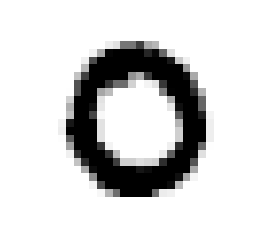

Index(['label', 'pixel0', 'pixel1', 'pixel2', 'pixel3', 'pixel4', 'pixel5',
       'pixel6', 'pixel7', 'pixel8',
       ...
       'pixel774', 'pixel775', 'pixel776', 'pixel777', 'pixel778', 'pixel779',
       'pixel780', 'pixel781', 'pixel782', 'pixel783'],
      dtype='object', length=785)


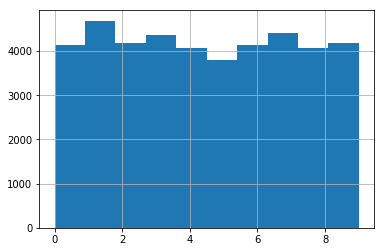

In [16]:
# print one number
myNumber = mnist.iloc[1,1:]
print (myNumber[:5])
myNumber=myNumber.values.reshape((28,28))
plt.imshow(myNumber, cmap = matplotlib.cm.binary,
           interpolation="nearest")
plt.axis("off")
plt.show()
mnist['label'].hist()
print(mnist.columns)


In [17]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import scipy.io
import warnings
warnings.filterwarnings('ignore')
Test = pd.read_csv("G:/Data Science/mnist/test (1).csv").values
Train = pd.read_csv("G:/Data Science/mnist/train (1).csv").values

In [18]:
Train.shape

(42000, 785)

In [19]:
Test.shape

(28000, 784)

In [20]:
X = (Train[:,1:])
Y = (Train[:,0])

a. Plot graph of component vs. cumulative explained variance .
This graph will help us in choosing the no of components for training our data.

(784,)
(42000, 412)


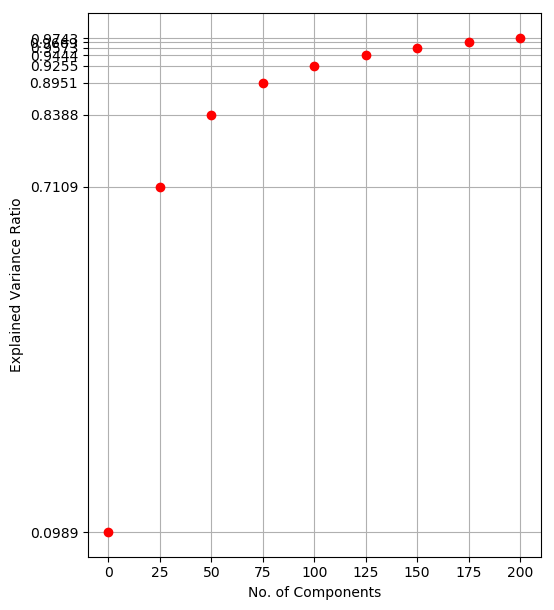

In [21]:
from sklearn.decomposition import PCA
# ## Removing the column with variance 0
variance = np.var(X, axis = 0)>1000
print(variance.shape)
X = X[:, variance]
Test = Test[:,variance]
print(X.shape)
# ##Calculate Principal Components
pca = PCA()
pca.fit(X)
explained_variance = pca.explained_variance_ratio_
# ##Calculate cumulative explained ration
cum_explained_variance = [np.sum(explained_variance[:i+1]) for i in range (0, 201, 25)]
X_axis = [i for i in range(0, 201,25)]

##Plot Graph
fig = plt.figure(figsize = (5.841, 7.195), dpi=100)
plt.plot(X_axis, cum_explained_variance, 'ro')
plt.grid(True, which = 'both')
plt.yticks(cum_explained_variance)
plt.xticks(X_axis)
plt.ylabel("Explained Variance Ratio")
plt.xlabel("No. of Components")
plt.show()

In [22]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size  = 0.20, random_state  = 0)

# Linear/Logistic Regression

In [23]:
from sklearn import linear_model
from sklearn.preprocessing import MinMaxScaler

def normalize(sigma2, mean2, X):
    X = (X-mean2)/sigma2
    return X

def PolynomialFeatures1(X):
    X_2 = np.square(X)
    X = np.column_stack((X, X_2))
    return X

J1 = []
J2 = []

##Take n principal components
def PrincipalComponents(n):
    pca = PCA(n_components= n)
    X_train1 = pca.fit_transform(X_train)
    X_test1 = pca.transform(X_test)
    return X_train1, X_test1

## Logistic Regression

def LogisticRegression(X_train2, y_train2, X_test2, y_test2, penalty):
    print("penalty= ", penalty)
    regr = linear_model.LogisticRegression(solver='lbfgs',max_iter=1000, C=penalty)
    regr.fit(X_train2, y_train2)
    score1 = regr.score(X_train2, y_train2)
    score2 = regr.score(X_test2, y_test2)
    print(score1, score2)
    Prediction = regr.predict(X_test2)
    return score1, score2, Prediction

penalty=  0.1
0.8914554272286386 0.8953571428571429
penalty=  0.1
0.8932142691037627 0.8955952380952381
penalty=  0.1
0.8933089865658015 0.8952380952380953
penalty=  0.1
0.892575813232113 0.8955952380952381
penalty=  0.1
0.892657974693281 0.8958333333333334
penalty=  0.1
0.8923675502708992 0.895
penalty=  0.1
0.8926933554015378 0.895952380952381
penalty=  0.1
0.8920691124881152 0.8951190476190476
penalty=  0.1
0.8923783631761507 0.8954761904761904
penalty=  0.1
0.8920032237843647 0.8957142857142857


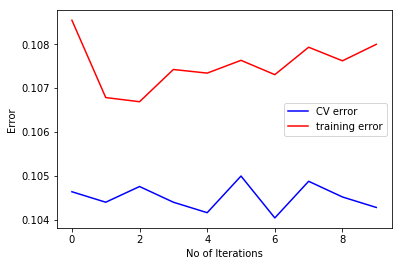

In [24]:
X_train1, X_test1 = PrincipalComponents(0.8)   # Getting principal components
J1 = []
J2 = []
for i in range(20000, X_train1.shape[0], 1500):
    score1, score2, Prediction = LogisticRegression(X_train1[:i+1,:], y_train[:i+1, ], 
                                                    X_test1[:i+1,:], y_test[:i+1], 0.1)
    J1.append(1-score1)
    J2.append(1-score2)
    
    
plt.plot(J2, 'b-', label = "CV error")
plt.plot(J1, 'r-', label ="training error")
plt.legend()
plt.ylabel("Error")
plt.xlabel("No of Iterations")
plt.show()

penalty=  0.1
0.9106044697765112 0.9085714285714286
penalty=  0.1
0.9115389981861308 0.909047619047619
penalty=  0.1
0.9116560149558715 0.909047619047619
penalty=  0.1
0.9108607811926044 0.9078571428571428
penalty=  0.1
0.9107342025306719 0.9072619047619047
penalty=  0.1
0.9104759826915385 0.9085714285714286
penalty=  0.1
0.9101410296196683 0.9082142857142858
penalty=  0.1
0.9104947378774466 0.9088095238095238
penalty=  0.1
0.9100965594825162 0.9092857142857143
penalty=  0.1
0.9097638876451449 0.9089285714285714


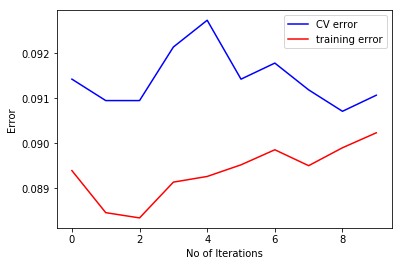

In [25]:
X_train1, X_test1 = PrincipalComponents(0.9)
J1 = []
J2 = []
for i in range(20000, X_train1.shape[0], 1500):
    score1, score2, Prediction = LogisticRegression(X_train1[:i+1,:],
                                                    y_train[:i+1, ], X_test1[:i+1,:], y_test[:i+1],0.1)
    J1.append(1-score1)
    J2.append(1-score2)
    
    
plt.plot(J2, 'b-', label = "CV error")
plt.plot(J1, 'r-', label ="training error")
plt.legend()
plt.ylabel("Error")
plt.xlabel("No of Iterations")
plt.show()

In [26]:
from sklearn.preprocessing import PolynomialFeatures
# poly = PolynomialFeatures(include_bias = False)

X1 = X.copy()
Test1 = Test.copy()

pca = PCA(n_components= 0.8388)
X1 = pca.fit_transform(X1)
Test1 = pca.transform(Test)

print(X1.shape, Test1.shape)

X1 = poly.fit_transform(X1)
Test1 = poly.fit_transform(Test1)

print(X1.shape, Test1.shape)

sigma = np.std(X1, axis = 0)
mean = np.mean(X1, axis = 0)

X1 = normalize(sigma, mean, X1)
Test1 = normalize(sigma , mean, Test1)
print(X1.shape, Test1.shape)


regr = linear_model.LogisticRegression(solver='lbfgs',max_iter=1000, C=0.1)
regr.fit(X1, Y)
score1 = regr.score(int(X1), int(Y))
print(score1)
Prediction = regr.predict(Test1)
image_id = np.arange(1,Prediction.shape[0]+1)
pd.DataFrame({"ImageId": image_id, "Label": Prediction}).to_csv('out_reg1.csv', 
                                                                      index=False, header=True)

(42000, 51) (28000, 51)


NameError: name 'poly' is not defined

# SVM

(8400, 43) (33600, 43)
0.999880004799808 0.9779761904761904
0.999924531149768 0.978452380952381
0.9999285739795007 0.9780952380952381
0.9997966170638284 0.9794047619047619
0.9997742008322312 0.9791666666666666
0.9997846220116304 0.9801190476190477


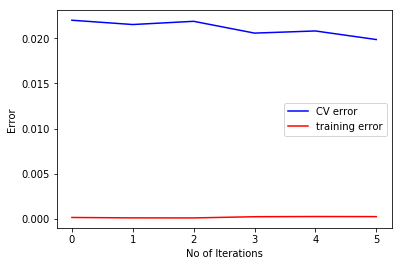

In [27]:
from sklearn.preprocessing import PolynomialFeatures
from sklearn.svm import SVC

def supportVM(X_train2, y_train2, X_test2, y_test2, penalty):
    regr = SVC(kernel ='rbf', C=penalty)
    regr.fit(X_train2, y_train2)
    score1 = regr.score(X_train2, y_train2)
    score2 = regr.score(X_test2, y_test2)
    print(score1, score2)
    Prediction = regr.predict(X_test2)
    return score1, score2, Prediction

X_train1, X_test1 = PrincipalComponents(0.81)
print(X_test1.shape, X_train1.shape)

sigma = np.std(X_train1, axis = 0)
mean = np.mean(X_train1, axis = 0)

X_train1 = normalize(sigma , mean , X_train1)
X_test1 = normalize(sigma , mean, X_test1)

J1 = []
J2 = []
for i in range(25000, X_train1.shape[0], 1500):
    score1, score2, Prediction = supportVM(X_train1[:i+1,:], 
                                                    y_train[:i+1, ], X_test1[:i+1,:], y_test[:i+1],10)
    J1.append(1-score1)
    J2.append(1-score2)
    
plt.plot(J2, 'b-', label = "CV error")
plt.plot(J1, 'r-', label ="training error")
plt.legend()
plt.ylabel("Error")
plt.xlabel("No of Iterations")
plt.show()

In [29]:
from sklearn.preprocessing import PolynomialFeatures
from sklearn.svm import SVC
# poly = PolynomialFeatures(include_bias = False)

X1 = X.copy()
Test1 = Test.copy()

pca = PCA(n_components= 0.8388)
X1 = pca.fit_transform(X1)
Test1 = pca.transform(Test)

print(X1.shape, Test1.shape)

print(X1.shape, Test1.shape)

sigma = np.std(X1, axis = 0)
mean = np.mean(X1, axis = 0)

X1 = normalize(sigma, mean, X1)
Test1 = normalize(sigma , mean, Test1)
print(X1.shape, Test1.shape)


regr = SVC(kernel ='rbf', C=10)
regr.fit(X1, Y)
score1 = regr.score(X1, Y)
print(score1)
Prediction = regr.predict(Test1)
Prediction = regr.predict(Test1)
image_id = np.arange(1,Prediction.shape[0]+1)
pd.DataFrame({"ImageId": image_id, "Label": Prediction}).to_csv("G:/Data Science/mnist/out_svm.csv", 
                                                                      index=False, header=True)

(42000, 51) (28000, 51)
(42000, 51) (28000, 51)
(42000, 51) (28000, 51)
0.9999285714285714
